# 01 — Validação da Ingestão (Bronze)

Este notebook verifica os artefatos gerados pela etapa **Ingest** em `bronze/movies_raw.parquet` e `bronze/ratings_raw.parquet`.

In [2]:
from pathlib import Path
import pandas as pd
BASE_DIR = Path('..')  # altere para o caminho raiz do seu projeto, se necessário
BRONZE = BASE_DIR / 'bronze'
movies_path = BRONZE / 'movies_raw.parquet'
ratings_path = BRONZE / 'ratings_raw.parquet'
print('Movies path:', movies_path)
print('Ratings path:', ratings_path)
assert movies_path.exists(), f'Arquivo não encontrado: {movies_path}'
assert ratings_path.exists(), f'Arquivo não encontrado: {ratings_path}'

Movies path: ..\bronze\movies_raw.parquet
Ratings path: ..\bronze\ratings_raw.parquet


In [3]:
# Carrega os datasets da camada Bronze
movies_raw = pd.read_parquet(movies_path)
ratings_raw = pd.read_parquet(ratings_path)
print(f'movies_raw: {movies_raw.shape[0]:,} linhas x {movies_raw.shape[1]} colunas')
print(f'ratings_raw: {ratings_raw.shape[0]:,} linhas x {ratings_raw.shape[1]} colunas')
movies_raw.head()

movies_raw: 45,466 linhas x 24 colunas
ratings_raw: 26,024,289 linhas x 4 colunas


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,False,7.7,5415.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Amostra do ratings_raw
ratings_raw.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
# Dtypes e checagens rápidas de qualidade
display(movies_raw.dtypes)
display(ratings_raw.dtypes)
print('\nColunas de movies_raw:', list(movies_raw.columns))
print('Colunas de ratings_raw:', list(ratings_raw.columns))

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


Colunas de movies_raw: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Colunas de ratings_raw: ['userId', 'movieId', 'rating', 'timestamp']


In [6]:
# Contagens úteis (únicos e valores nulos)
import numpy as np
def null_report(df, top=20):
    s = df.isna().mean().sort_values(ascending=False)
    return (s * 100).round(2).head(top)

print('\nNulos (%) — movies_raw:')
display(null_report(movies_raw))
print('\nNulos (%) — ratings_raw:')
display(null_report(ratings_raw))

if 'id' in movies_raw.columns:
    print('Filmes únicos por id:', movies_raw['id'].nunique())
if 'movieId' in ratings_raw.columns:
    print('IDs de filme presentes no ratings_raw:', ratings_raw['movieId'].nunique())
if 'userId' in ratings_raw.columns:
    print('Usuários no ratings_raw:', ratings_raw['userId'].nunique())


Nulos (%) — movies_raw:


belongs_to_collection    90.12
homepage                 82.88
tagline                  55.10
overview                  2.10
poster_path               0.85
runtime                   0.58
status                    0.19
release_date              0.19
imdb_id                   0.04
original_language         0.02
spoken_languages          0.01
title                     0.01
video                     0.01
vote_average              0.01
revenue                   0.01
vote_count                0.01
popularity                0.01
production_companies      0.01
production_countries      0.01
original_title            0.00
dtype: float64


Nulos (%) — ratings_raw:


userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

Filmes únicos por id: 45436
IDs de filme presentes no ratings_raw: 45115
Usuários no ratings_raw: 270896


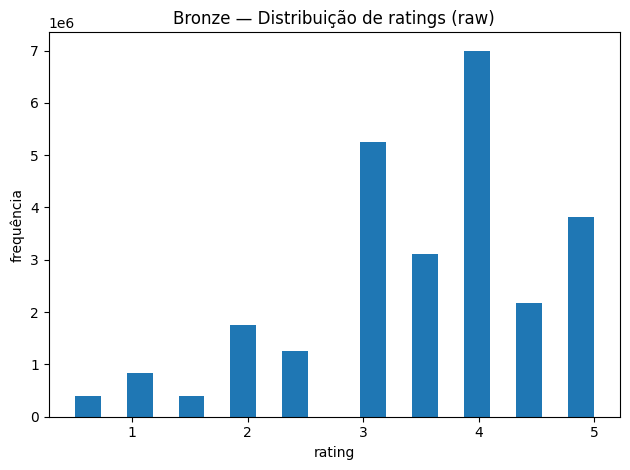

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

r = pd.to_numeric(ratings_raw.get('rating', pd.Series(dtype=float)), errors='coerce').dropna()
if r.empty:
    print("ratings_raw['rating'] está vazio ou ausente.")
else:
    r.plot(kind='hist', bins=20)
    plt.title('Bronze — Distribuição de ratings (raw)')
    plt.xlabel('rating')
    plt.ylabel('frequência')
    plt.tight_layout()
    plt.show()


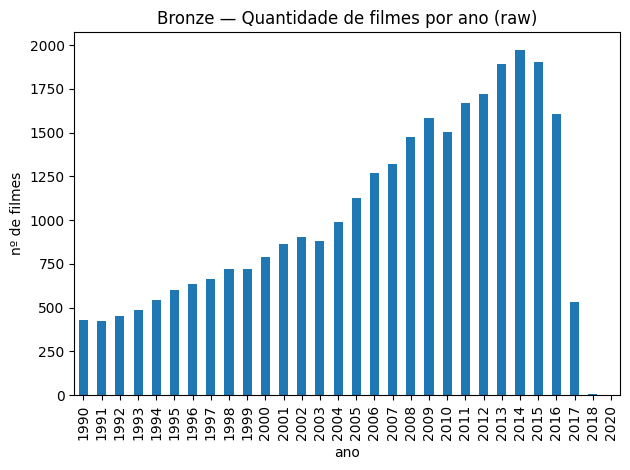

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.to_datetime(movies_raw.get('release_date', pd.Series(dtype=str)), errors='coerce')
year_counts = dates.dt.year.dropna().astype(int).value_counts().sort_index()
if year_counts.empty:
    print("movies_raw['release_date'] vazio/ausente ou não parseável.")
else:
    year_counts_tail = year_counts.tail(30)  # últimos 30 anos para leitura melhor
    year_counts_tail.plot(kind='bar')
    plt.title('Bronze — Quantidade de filmes por ano (raw)')
    plt.xlabel('ano')
    plt.ylabel('nº de filmes')
    plt.tight_layout()
    plt.show()
